//recommendation System

##Importing libraries

In [203]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds # for sparse matrices

## Importing Dataset and adding Header to table

In [204]:
import pandas as pd

# Import the data set
df = pd.read_csv('/content/drive/MyDrive/data_fixup2.csv',header=None,encoding ='latin1')

df.columns = ['user_id', 'prod_id', 'rating','description'] # Adding column names

#df = df.drop('timestamp', axis=1) # Dropping timestamp

df_copy = df.copy(deep=True) # Copying the data to another dataframe


In [205]:
df.head

<bound method NDFrame.head of               user_id  prod_id  rating                       description
0       AKM1MP6P0OYPR    15070       5            BIC 6 TRAY DISPLAY W/3
1      A2CX7LUOHB2NDG    15072       5             LTR BIC 3TIER DSP LCX
2      A2NWSAGRHCP8N5    15074       1             GAME CIGRLO PP.69 SBG
3      A2WNBOD3WNDNKT    15075       3            ECIG LOGIC COUNTER DIS
4      A1GI0U4ZRJA8WN    15078       1             B&M CIGRLO JAZZ PT/WT
...               ...      ...     ...                               ...
86333   ACRH7QSZUGRPX    82459       3     OWENS MIXER GRPFRT  LME 750ML
86334  A3MKHEGY3SLI5R    82460       1    CATTLEMANS CUT SMOKED SSG 12OZ
86335   AESYDIUAKVU2O    82461       1  CATTLEMANS CUT FLNK STK JRKY 9OZ
86336  A1H3M1B7BK5C8G    82462       4         BON APP PAN DE QUESO 4.OZ
86337  A2U7WWUBPIJG7E    82463       4              BON APP SEMITA 4.5 Z

[86338 rows x 4 columns]>

Converting encoding of data to utf-8 to provide same encoding fromat across whole dataset Mounting google drive for imporing dataset from drive

In [206]:
df.to_csv('/content/drive/MyDrive/data_fixup.csv', encoding='utf-8', index=False)

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA - Exploratory Data Analysis

check for -
- No of rows / no of columns
- datatype
- missing values


finally get the summary and check
- rating distribution.
- number of users and products.
- Users with highest no of ratings.

### Shape of data i.e no of rows and columns

In [208]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  86338
No of columns =  4


### Datatypes of data in Table

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86338 entries, 0 to 86337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      86338 non-null  object
 1   prod_id      86338 non-null  int64 
 2   rating       86338 non-null  int64 
 3   description  86338 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [210]:
print(df)

              user_id  prod_id  rating                       description
0       AKM1MP6P0OYPR    15070       5            BIC 6 TRAY DISPLAY W/3
1      A2CX7LUOHB2NDG    15072       5             LTR BIC 3TIER DSP LCX
2      A2NWSAGRHCP8N5    15074       1             GAME CIGRLO PP.69 SBG
3      A2WNBOD3WNDNKT    15075       3            ECIG LOGIC COUNTER DIS
4      A1GI0U4ZRJA8WN    15078       1             B&M CIGRLO JAZZ PT/WT
...               ...      ...     ...                               ...
86333   ACRH7QSZUGRPX    82459       3     OWENS MIXER GRPFRT  LME 750ML
86334  A3MKHEGY3SLI5R    82460       1    CATTLEMANS CUT SMOKED SSG 12OZ
86335   AESYDIUAKVU2O    82461       1  CATTLEMANS CUT FLNK STK JRKY 9OZ
86336  A1H3M1B7BK5C8G    82462       4         BON APP PAN DE QUESO 4.OZ
86337  A2U7WWUBPIJG7E    82463       4              BON APP SEMITA 4.5 Z

[86338 rows x 4 columns]


### Missing value analysis - Finding missing values in table columns

In [211]:
# Find number of missing values in each column
df.isna().sum()

user_id        0
prod_id        0
rating         0
description    0
dtype: int64

### Summary

In [212]:
# Summary statistics of 'rating' variable
df['rating'].describe()

count    86338.000000
mean         4.055144
std          1.342391
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

### Rating distribution Chart

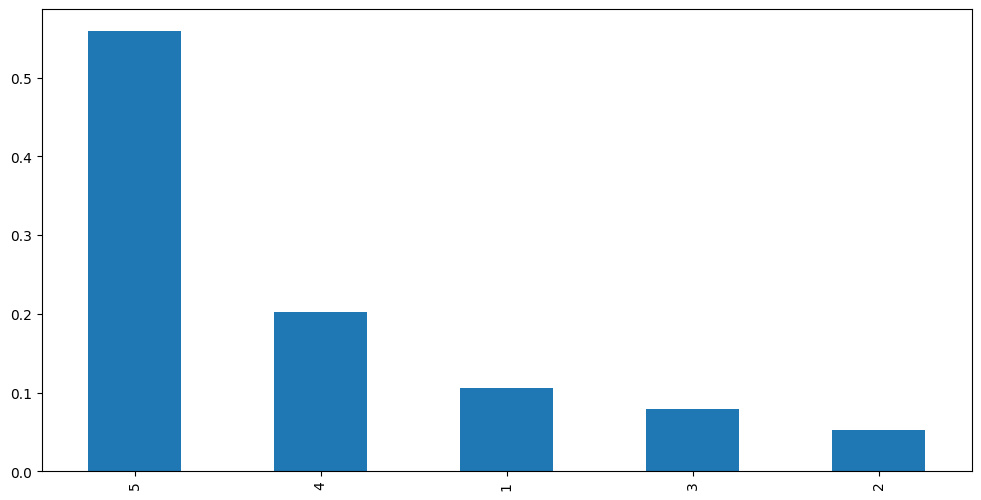

In [213]:
#Create the plot and provide observations

plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

The distribution is skewed to the right. Over 50% of the ratings are 5, followed by a little below 20% with 4 star ratings. And the percentages of ratings keep going down until below 10% of the ratings are 2 stars.

### No of unique users and Product items

In [214]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['prod_id'].nunique())

Number of unique USERS in Raw data =  78208
Number of unique ITEMS in Raw data =  64277


### Users with most no of rating

In [215]:
# tOP 10 USERS WHO HAVE PROVIDED MOST NO OF RATINGS TO THE PRODUCTS PROCURED
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
A231WM2Z2JL0U3    77
A2BGZ52M908MJY    48
AY8Q1X7G96HV5     36
A1MJMYLRTZ76ZX    29
A1NVD0TKNS1GT5    29
A1RPTVW5VEOSI     27
A3MEIR72XKQY88    25
A243HY69GIAHFI    25
ALUNVOQRXOZIA     25
AN30G4IKL1BMZ     23
dtype: int64

## Pre-Processing

Let's take a subset of the dataset (by only keeping the users who have given 5 or more ratings) to make the dataset less sparse and easy to work with.

In [216]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 5].index)]

In [217]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['prod_id'].nunique())

The number of observations in the final data = 2615
Number of unique USERS in the final data =  329
Number of unique PRODUCTS in the final data =  2567


- The dataframe **df_final has users who have rated 5 or more items**
- **We will use df_final to build recommendation systems**

### Checking the density of the rating matrix

In [218]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (329, 2567)
given_num_of_ratings =  2615
possible_num_of_ratings =  844543
density: 0.31%


prod_id,20,583,639,663,852,889,940,967,1308,1437,...,81805,81807,81842,81862,81897,82013,82198,82261,82348,82390
user_id,,,,,,,,,,,,,,,,,,,,,
A10C84Y38RT22P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
A10DIDVYDN2Q5Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11ED8O95W2103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A123WML9K2WDX4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Rank Based Recommendation System

In [221]:
#Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head(10)

,avg_rating,rating_count
prod_id,,
20,5.0,1
47277,5.0,1
47245,5.0,1
47240,5.0,1
47233,5.0,1
47124,5.0,1
47123,5.0,1
47112,5.0,1
47101,5.0,1


In [220]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

## Recommending top n products with 2 minimum interactions based on popularity

In [222]:
list(top_n_products(final_rating, 5, 2)) #here only one product is in matrix with minimum 2 interactions

[13759]

# Collaborative Filtering based Recommendation System

## User based collaborative filtering Matrix

In [223]:
final_ratings_matrix.head()

prod_id,20,583,639,663,852,889,940,967,1308,1437,...,81805,81807,81842,81862,81897,82013,82198,82261,82348,82390
user_id,,,,,,,,,,,,,,,,,,,,,
A10C84Y38RT22P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
A10DIDVYDN2Q5Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11ED8O95W2103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A123WML9K2WDX4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, user_id (index) is of the object data type. We will replace the user_id by numbers starting from 0 to 1539 (for all user ids) so that the index is of integer type and represents a user id in the same format

In [224]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

prod_id,20,583,639,663,852,889,940,967,1308,1437,...,81805,81807,81842,81862,81897,82013,82198,82261,82348,82390
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to find Similar users and their similarity scores

In [225]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

#### Finding out top 10 similar users to the user index 3 i.e. for user id @ index no-3 and their similarity score

In [226]:
similar = similar_users(3,final_ratings_matrix)[0][0:10]
similar

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]

In [227]:
#Print the similarity score
similar_users(3,final_ratings_matrix)[1][0:10]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]])]

#### Finding out top 10 similar users to the user index N i.e. user id @ index no N and their similarity score

In [228]:
similar = similar_users(15, final_ratings_matrix)[0][0:10]
similar

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Function to recommend products

In [229]:
# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

#### Recommend n no of products to user index x based on similarity based collaborative filtering

In [230]:
recommendations(78,5,final_ratings_matrix)

[37794, 37861, 81897, 40782, 34961]

In [231]:
final_ratings_matrix = final_ratings_matrix.apply(pd.to_numeric, errors='coerce')



# **//Refactoring for product recommendation with
# product Description -> function to recommend N no of products to user id @ index no X **


In [232]:
def recommendations_with_description(user_index, num_of_products, interactions_matrix, original_csv_path):
    # Call the existing recommendations function to get product IDs
    recommended_product_ids = recommendations(user_index, num_of_products, interactions_matrix)

    # Fetch product names (descriptions) from the original CSV file based on product IDs
    original_data = pd.read_csv(original_csv_path, names=['user_id', 'prod_id', 'rating', 'description'],encoding='latin1')
    recommended_products_with_descriptions = original_data.loc[original_data['prod_id'].isin(recommended_product_ids), ['prod_id', 'description']]

    # Filter out duplicate product IDs and keep the first occurrence
    recommended_products_with_descriptions = recommended_products_with_descriptions.drop_duplicates(subset=['prod_id'], keep='first')

    # Combine product IDs and descriptions into a list of tuples
    recommendations_with_description = list(zip(recommended_products_with_descriptions['prod_id'], recommended_products_with_descriptions['description']))

    return recommendations_with_description[:num_of_products]


**Recommend n products to user id @ index no N**

In [233]:
# Provide the path to the original CSV file
original_csv_path = '/content/drive/MyDrive/data_fixup2.csv'

# Call the modified recommendations_with_description function
result = recommendations_with_description(6, 5, final_ratings_matrix, original_csv_path) #user index followed by no of recommendations required

# Display the result
print(result)


[(34961, 'LG CRAN WAL'), (37794, 'BLACK AND WHITE'), (37861, 'CHICKEN TENDERS (9)'), (40782, 'CAMEL TB ROYAL $.50 OFF 1PK'), (81897, '10FT PHONE CORD')]


# Model based Collaborative Filtering: Singular Value Decomposition

**We have seen above that the interaction matrix is highly sparse. SVD is best to apply on a large sparse matrix. Note that for sparse matrices, we can use the sparse.linalg.svds() function to perform the decomposition**

Also, we will use **k=50 latent features** to predict rating of products

## CSR matrix

In [234]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)


## SVD

In [235]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [236]:
U.shape

(329, 50)

In [237]:
sigma.shape

(50, 50)

In [238]:
Vt.shape

(50, 2567)

Now, let's regenerate the original matrix using U, Sigma, and Vt matrices. The resulting matrix would be the predicted ratings for all users and products

## Predicting ratings

In [239]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

## Evaluating the model

In [240]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

prod_id,20,583,639,663,852,889,940,967,1308,1437,...,81805,81807,81842,81862,81897,82013,82198,82261,82348,82390
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

prod_id
20     0.015198
583    0.006079
639    0.012158
663    0.015198
852    0.015198
dtype: float64

In [242]:
preds_df.head()

prod_id,20,583,639,663,852,889,940,967,1308,1437,...,81805,81807,81842,81862,81897,82013,82198,82261,82348,82390
0,3.243802e-31,8.802666e-33,4.063249e-32,5.794550e-32,2.468739e-30,7.418171e-32,3.504644e-32,6.673758e-32,4.034636e-17,7.758378e-33,...,1.580951e-30,1.161712e-30,3.368242e-16,6.363046e-18,3.136091e-31,2.878848e-16,1.611497e-31,2.822994e-31,8.371366e-32,1.157213e-31
1,6.239703e-33,1.784350e-33,4.299097e-33,4.653033e-33,1.597928e-32,4.682111e-33,1.611383e-33,4.684154e-33,2.565207e-18,3.049425e-34,...,5.304995e-32,2.212949e-32,3.707342e-18,3.753632e-20,2.122262e-33,7.156130e-18,2.058945e-32,8.190365e-33,1.706821e-32,1.412279e-33
2,4.041305e-31,1.563338e-32,8.859966e-32,5.151172e-32,2.852451e-30,6.931607e-32,3.822642e-32,6.135434e-32,1.019119e-16,9.147712e-33,...,1.058454e-30,7.513231e-31,3.422202e-16,5.048418e-18,2.908523e-31,2.186973e-16,1.909035e-31,2.278777e-31,1.047679e-31,1.074982e-31
3,1.141401e-32,9.936723e-34,7.401365e-33,4.957552e-33,2.650391e-32,4.820073e-33,1.610972e-33,4.905985e-33,7.080048e-18,1.263984e-33,...,4.526474e-32,5.977735e-34,1.163640e-17,4.399452e-19,5.402442e-34,5.521264e-18,7.418224e-33,5.823836e-33,3.037166e-33,3.224374e-34
4,7.193305e-32,4.322096e-33,4.911217e-32,2.941231e-32,1.054999e-31,2.261482e-32,8.353680e-32,2.855360e-32,7.023476e-18,9.045468e-33,...,3.221690e-31,5.994625e-32,9.909775e-17,5.908129e-19,1.086968e-32,2.018836e-16,2.873819e-32,5.351198e-32,6.392560e-32,5.288025e-33


In [ ]:
________________________________________________________________________________________________________________________________________________
###############################################################################################################################################

#############################################################################################################################################################################################################################################################################################################

In [ ]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

In [ ]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.01367938977985801 

